In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [2]:
%autoreload

In [3]:
import sys
sys.path.append('../../') #takes us to the directory named foreground_functions that housed the foreground_function.py 
#and the w3j.npy files


#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
from scipy.optimize import curve_fit, minimize

Populating the interactive namespace from numpy and matplotlib


# parameters for generating map

In [5]:
params_s = [1.7e3, -3.0, -3.2, -2.5]
A_s, alpha_s, beta_s, gamma_s = params_s
params_d = [4.5e3, -2.0, 1.59, -3.5] #look at https://arxiv.org/pdf/1405.0874.pdf for parameters potentially, as well as BICEP
#beta_d = 1.59 according to Planck
A_d, alpha_d, beta_d, gamma_d = params_d

params = params_s + params_d

nside=128
ells = np.arange(384)
freqs = np.linspace(30, 300, 10)*1.e9

# make some data to try to fit

In [7]:
data = ff.ps_data_fg(ells, freqs, params)

# make the input model

In [10]:
in_model = ff.model_fg(ells, freqs, params)

# try the optimisation

In [11]:
initial_s = [1.e3, -1., -1., -3.]
initial_d = [1.e3, -1., 1., -3.]
initial = initial_s + initial_d

In [12]:
start=time.time()
result = minimize(ff.chi2_fg, initial, args=(ells, freqs, data), method='L-BFGS-B', 
                   bounds=((None, None), (None, None), (None, None), (None, -2.01),
                           (None, None), (None, None), (None, None), (None, -2.01)))
print(time.time()-start)
print(result)

../../foreground_functions.py:30: RuntimeWarning: overflow encountered in power
  model[2:] = (ells[2:] / 80.)**alpha
../../foreground_functions.py:122: RuntimeWarning: invalid value encountered in multiply
  bcls *= (sigma_default/std)**2 #scaling the map scales the C_ell by the square factor
../../foreground_functions.py:338: RuntimeWarning: invalid value encountered in double_scalars
  sum = A_beta / (4 * pi * 80**gamma) * sum
../../foreground_functions.py:362: RuntimeWarning: invalid value encountered in double_scalars
  sum = A_beta / (4 * pi * 80**gamma) * sum
../../foreground_functions.py:239: RuntimeWarning: overflow encountered in multiply
  moment0x0[i] = pcls * sed_scaling[i]**2
../../foreground_functions.py:31: RuntimeWarning: overflow encountered in multiply
  return amp * model
../../foreground_functions.py:256: RuntimeWarning: overflow encountered in multiply
  moment0x0[i] = pcls * sed_scaling[i]**2
../../foreground_functions.py:340: RuntimeWarning: overflow encountered

95.82061624526978
      fun: nan
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.21690391e+01,  2.27523342e+03, -5.63284084e+04,  0.00000000e+00,
        5.66433300e+00,  8.09260753e+04,  8.14096653e+04,  5.46424417e+01])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1017
      nit: 58
   status: 2
  success: False
        x: array([ 1.15143466e+03, -3.03594535e+00, -3.77500745e+00, -1.60216114e+02,
        1.83887742e+03, -1.46596411e+00,  1.91232054e+00, -1.20423870e+01])


In [13]:
x = result.x

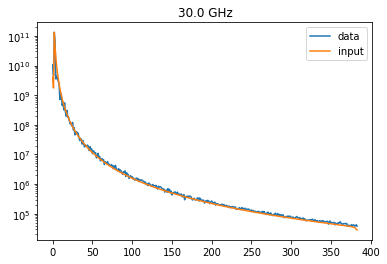

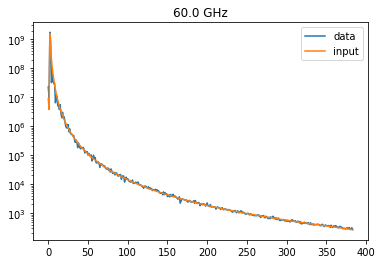

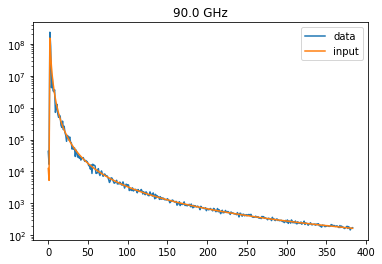

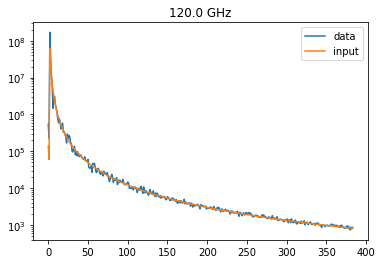

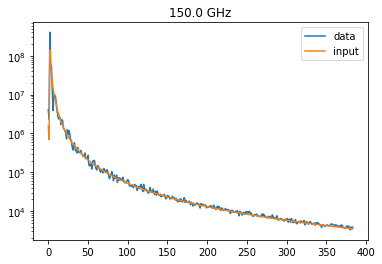

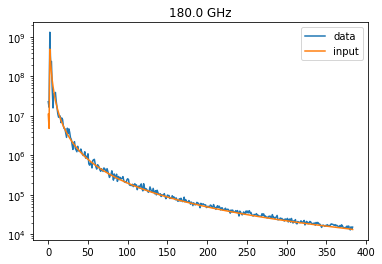

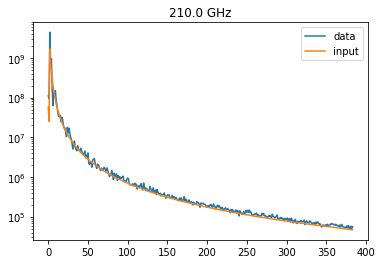

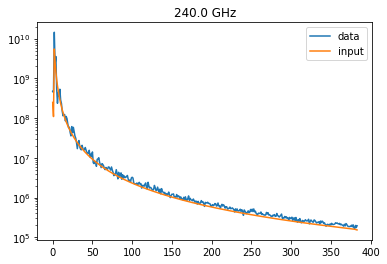

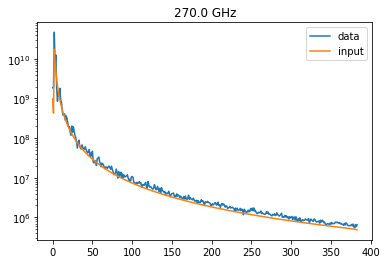

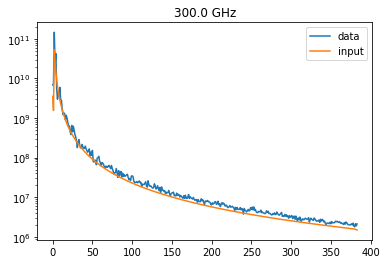

In [14]:
for i in range(len(freqs)):
    figure()
    semilogy(ells, data[i], label='data')
    semilogy(ells, in_model[i], label='input')
    title(str(np.round(freqs[i]*1e-9)) + ' GHz')
    legend()

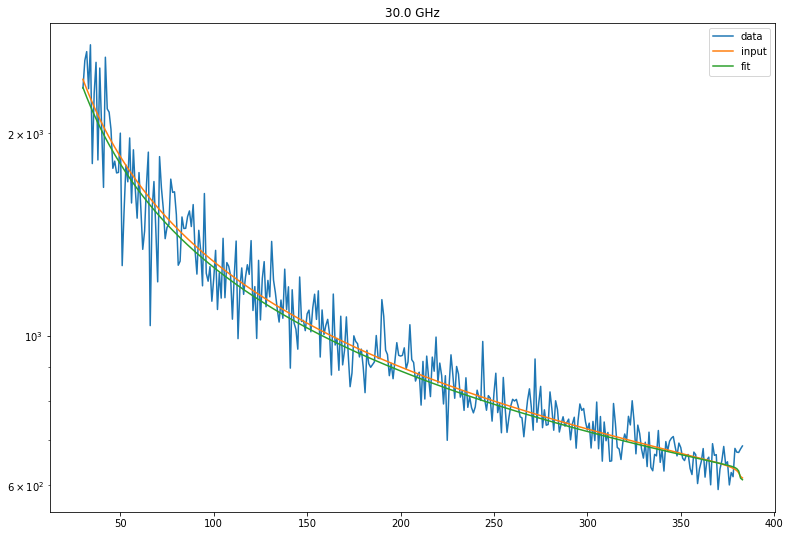

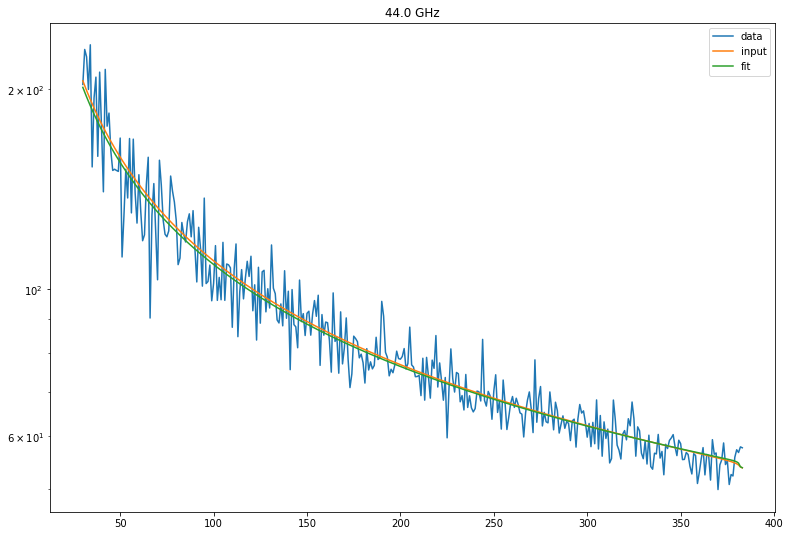

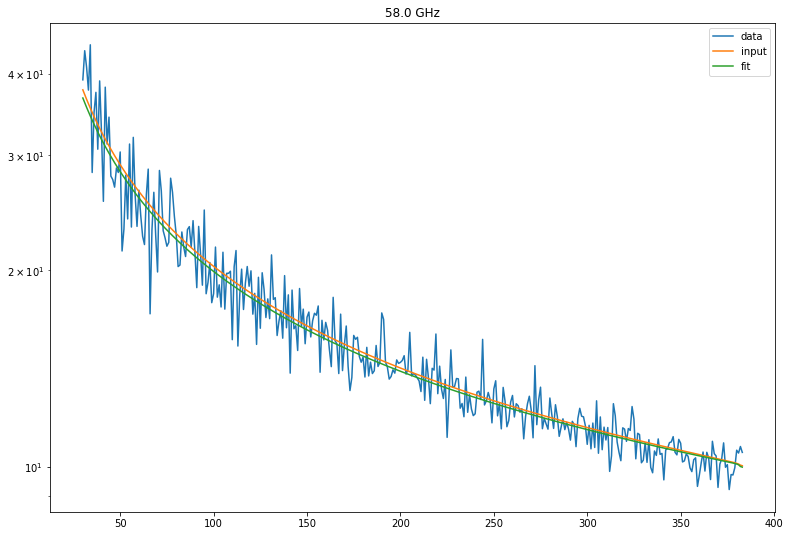

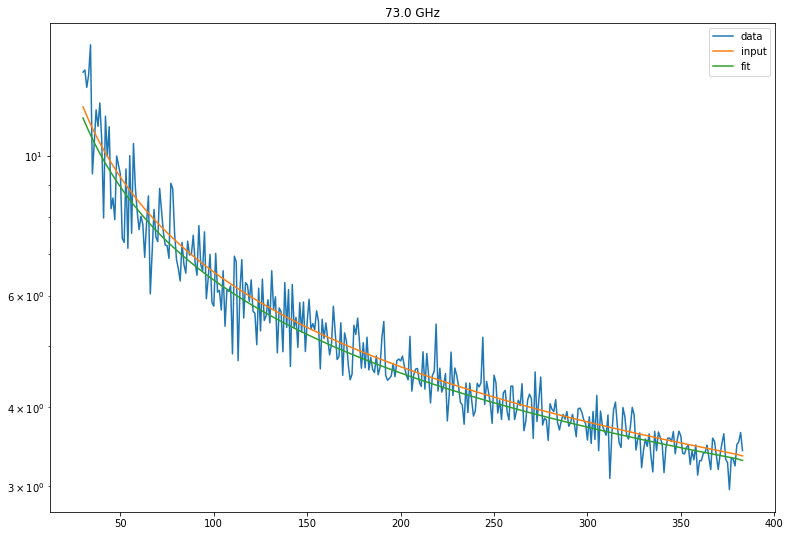

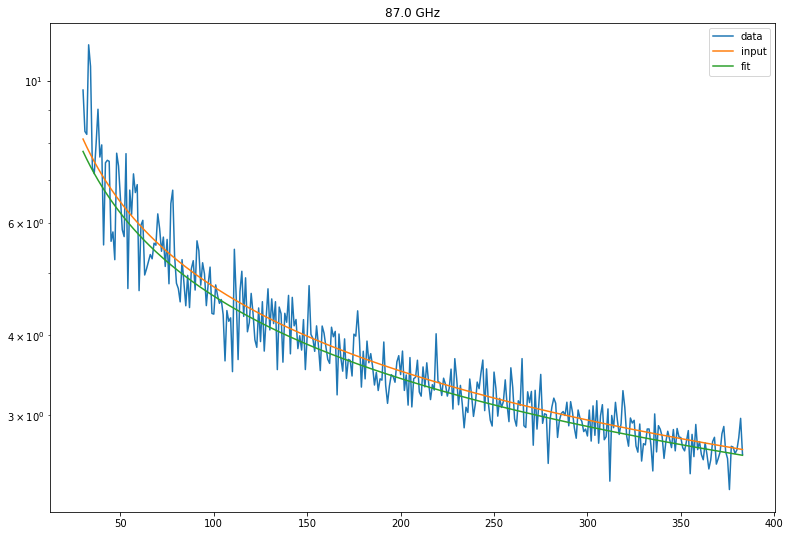

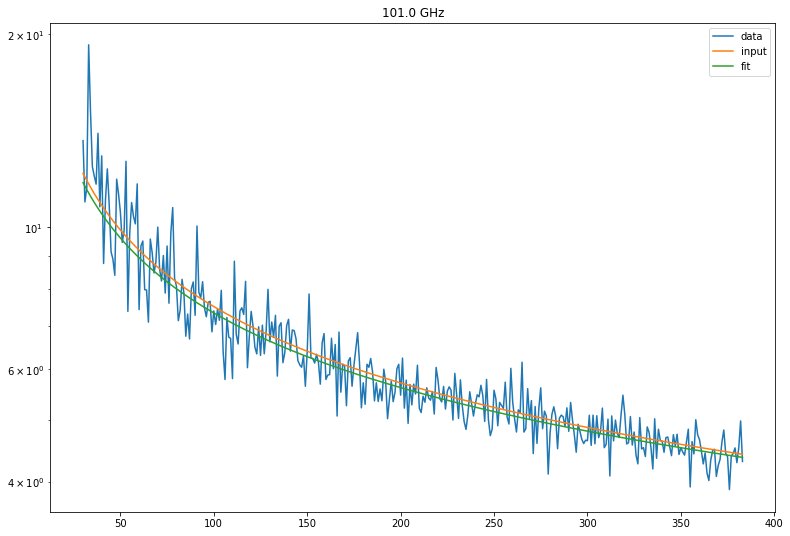

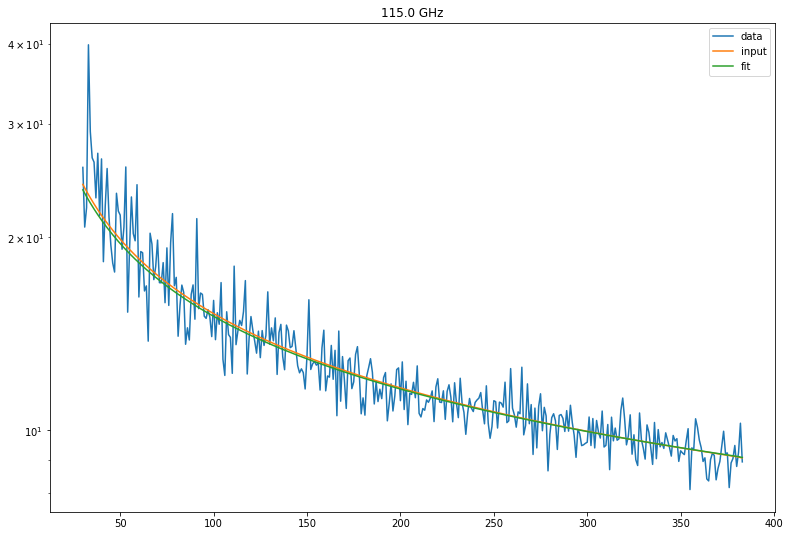

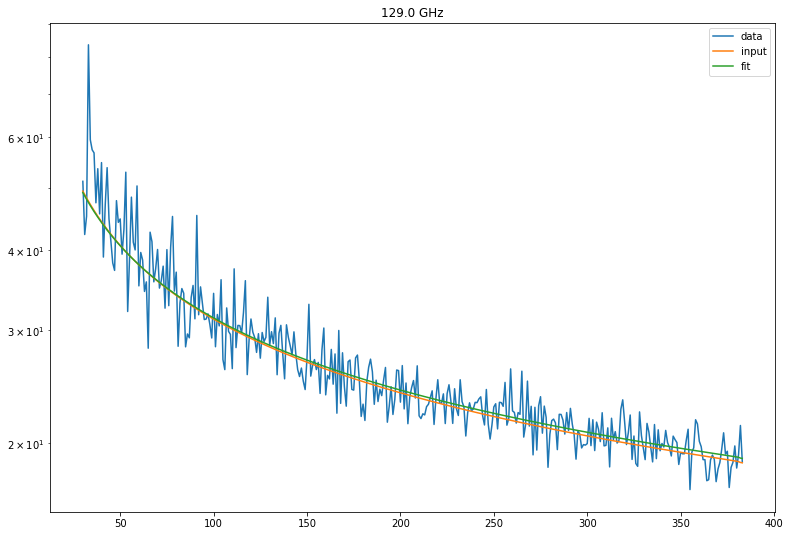

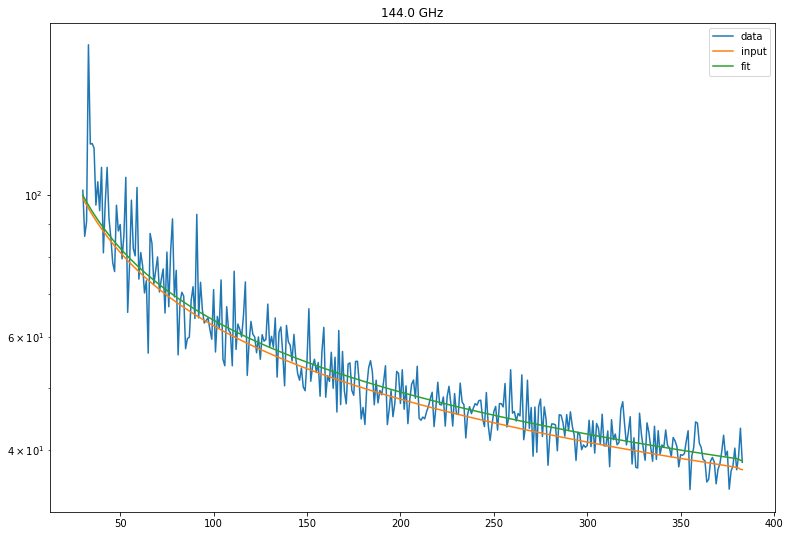

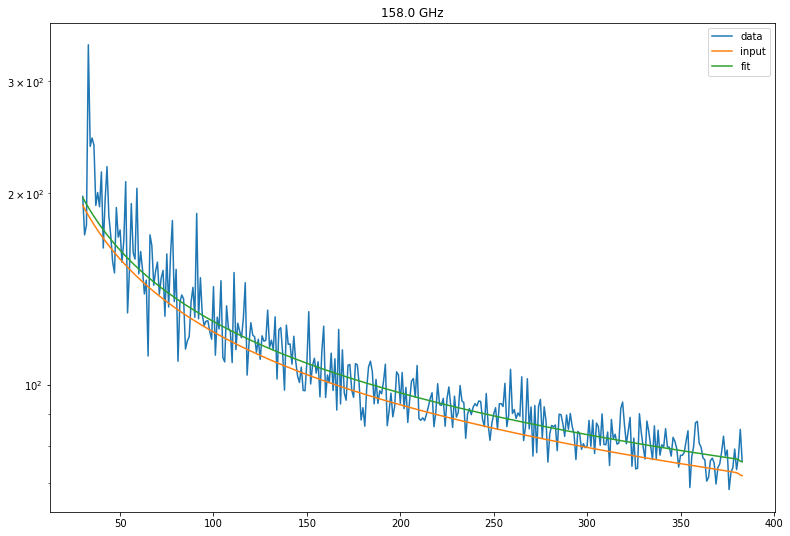

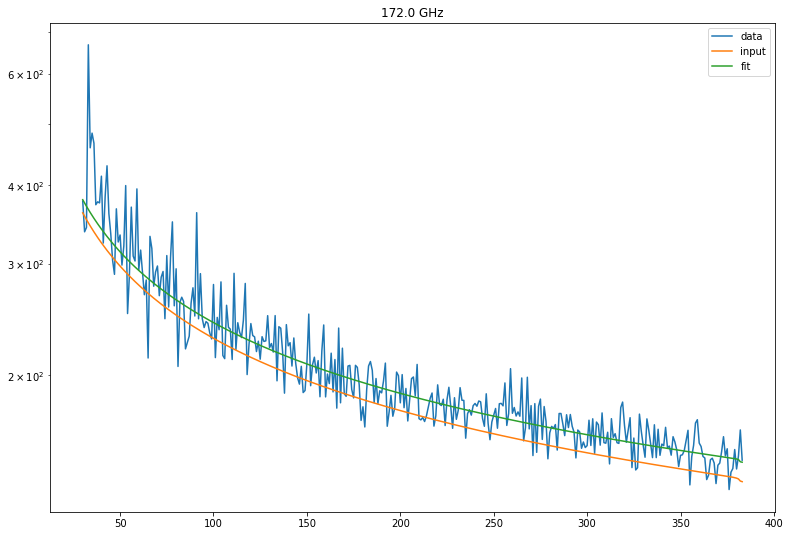

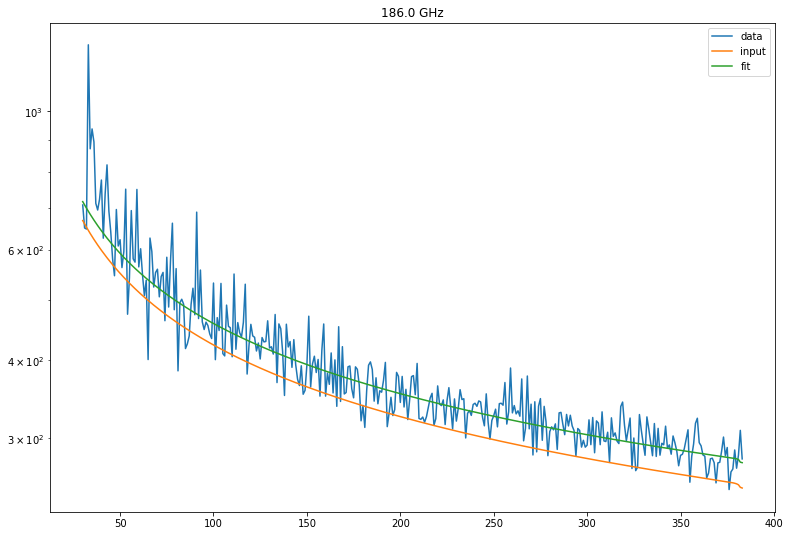

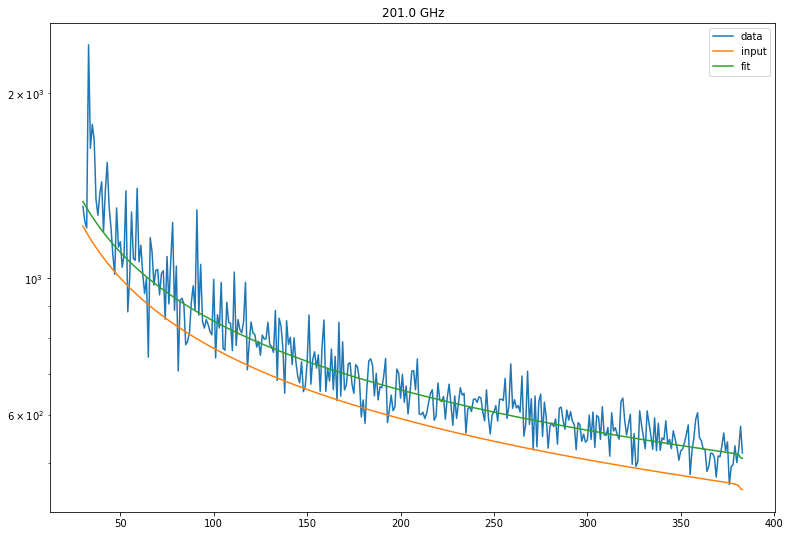

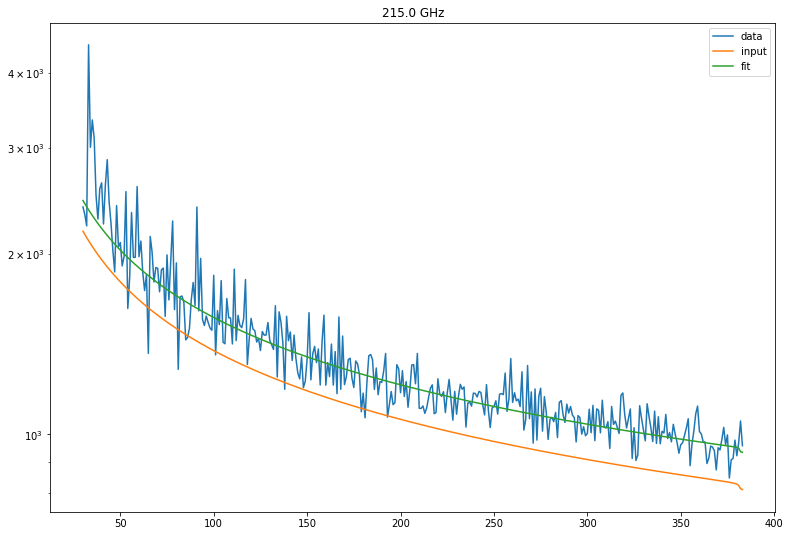

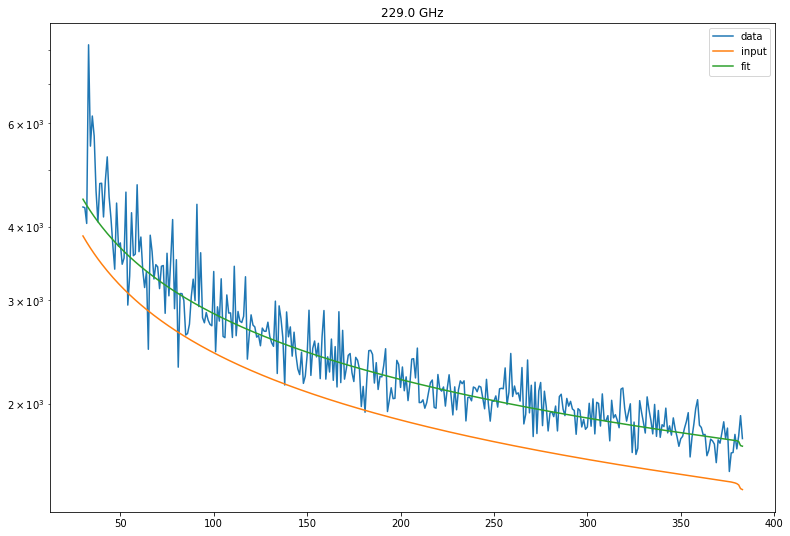

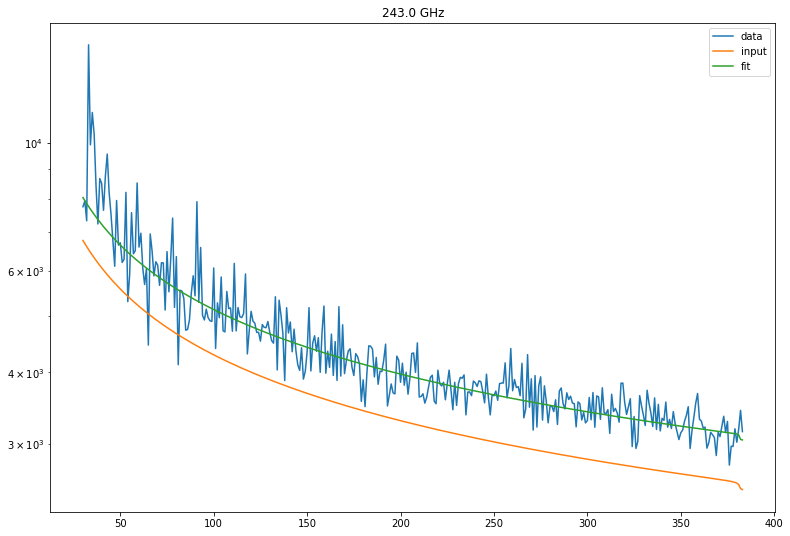

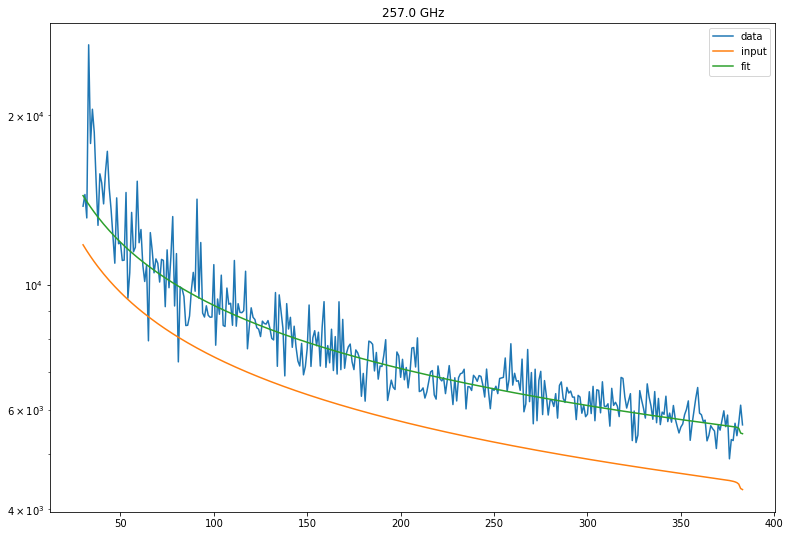

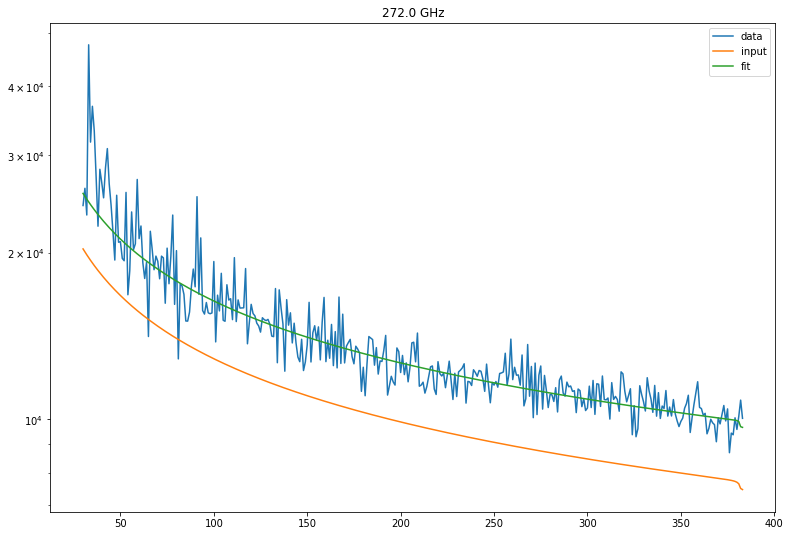

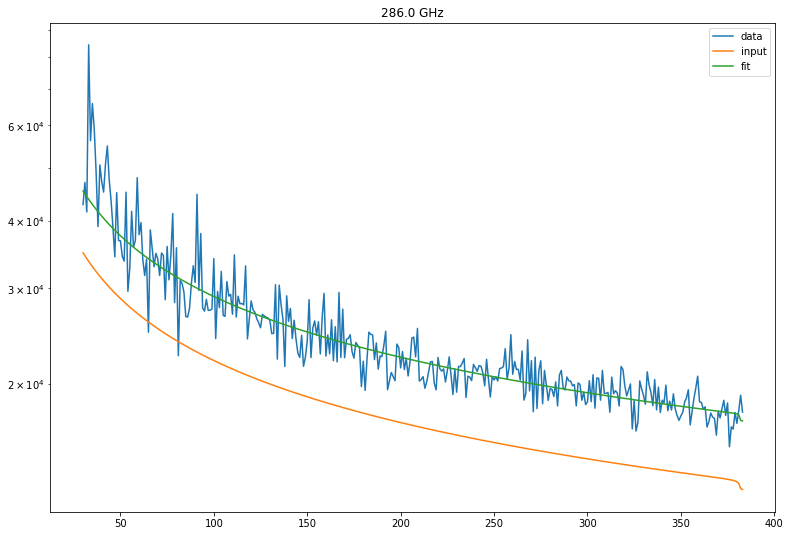

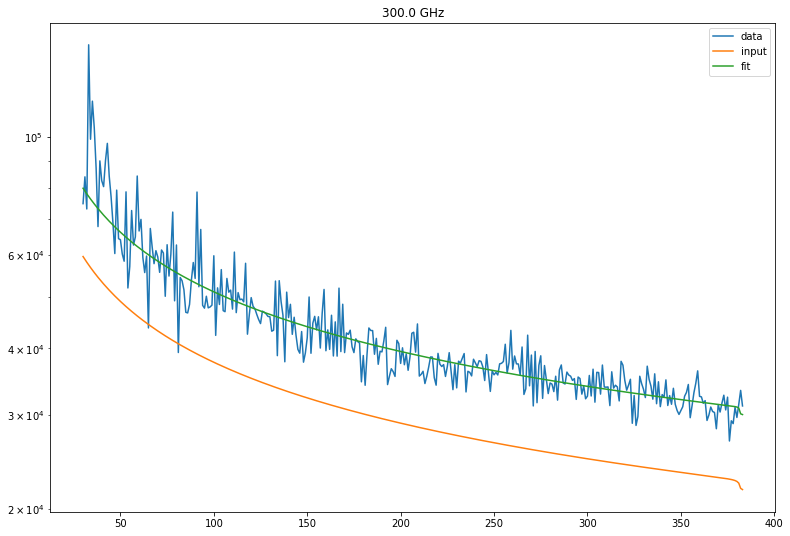

In [56]:
for i in range(len(freqs)):
    figure(figsize=(13,9))
    semilogy(ells[30:], data[i][30:], label='data')
    semilogy(ells[30:], model_fg[i][30:], label='input')
    semilogy(ells[30:], fit0[i][30:], label='fit')
    title(str(np.round(1e-9*freqs[i])) + ' GHz')
    legend()

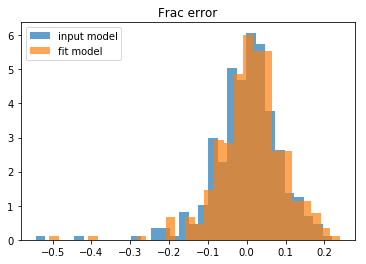

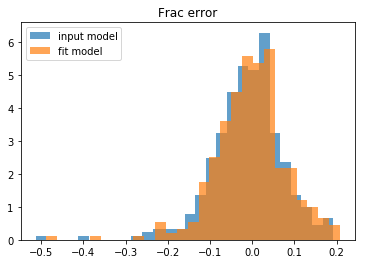

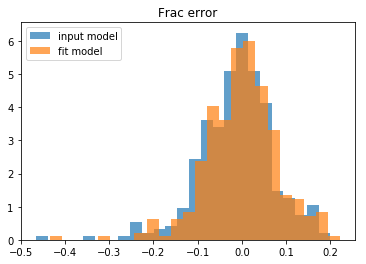

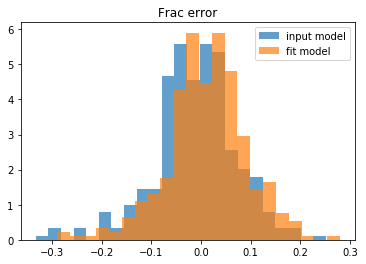

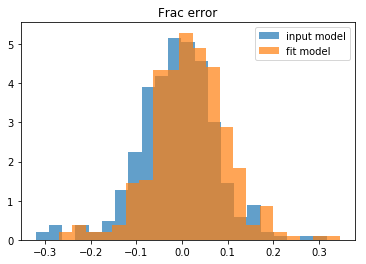

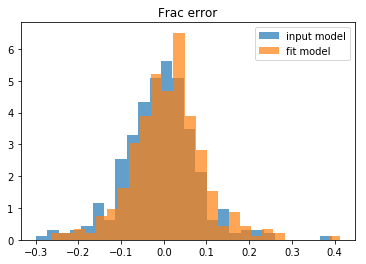

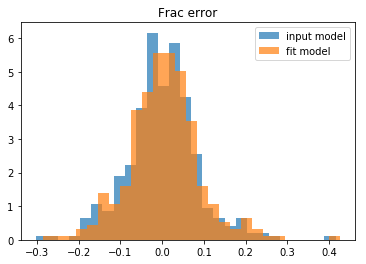

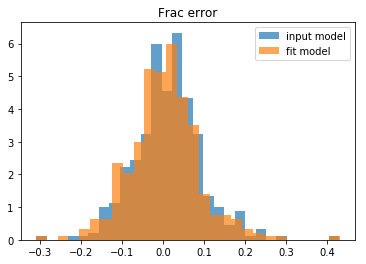

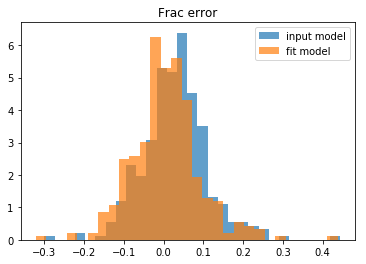

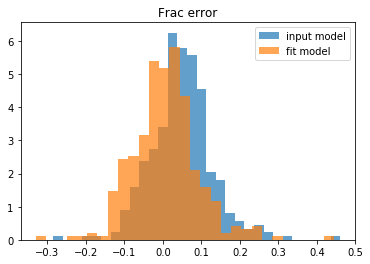

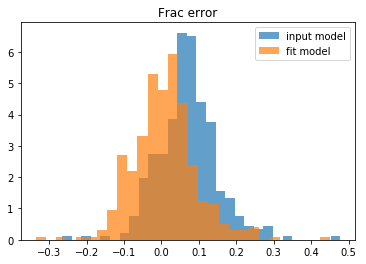

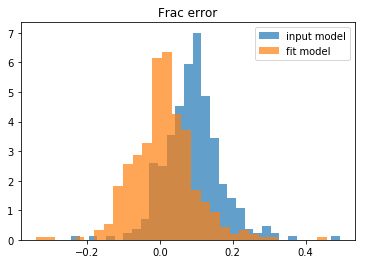

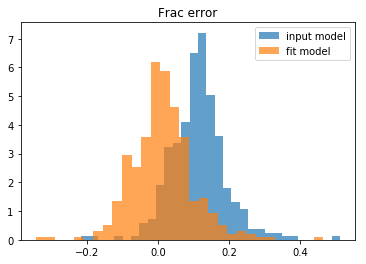

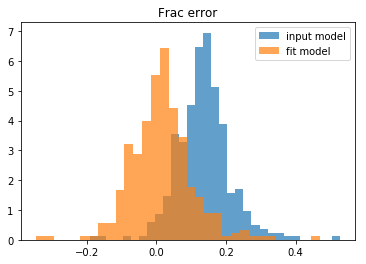

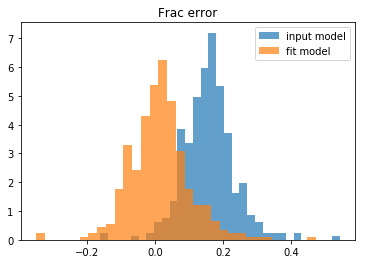

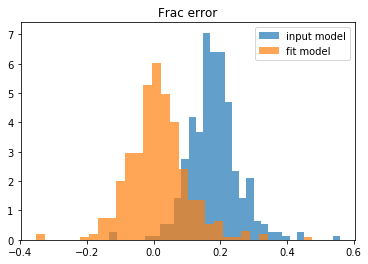

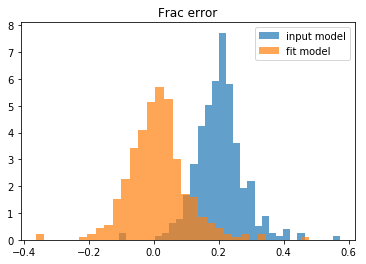

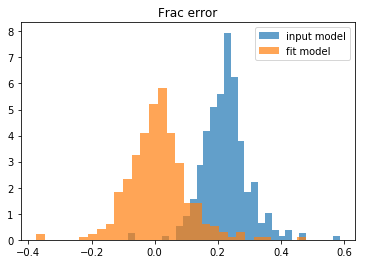

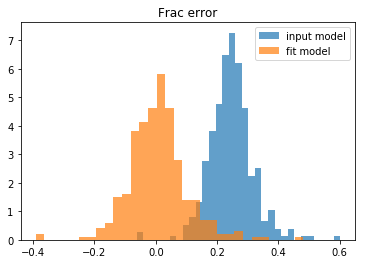

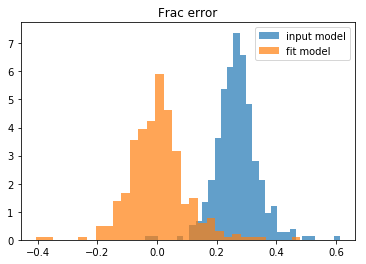

In [58]:
for i in range(len(freqs)):
    figure()
    hist((data[i][30:]-model_fg[i][30:])/data[i][30:], bins='auto', density=True, alpha=0.7, label='input model')
    hist((data[i][30:]-fit0[i][30:])/data[i][30:], bins='auto', density=True, alpha=0.7, label='fit model')
    title('Frac error')
    legend()

In [178]:
initial1 = [1.e3,-1.,-1.,-3.,3.e3,-1.,-1.,-3.]
#start closer to the correct amplitudes

In [179]:
start=time.time()
result1 = minimize(ff.chi2_fg, initial1, args=(ells, freqs, data), method='L-BFGS-B', 
                   bounds=((None, None), (None, None), (None, None), (None, -2.01),
                           (None, None), (None, None), (None, None), (None, -2.01)))
print(time.time()-start)
print(result1)

92.91362690925598
      fun: 10332.82677315224
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.36662366e+00,  1.10122062e+04,  5.12366896e+03, -2.07523235e+05,
       -1.95232133e+00,  5.73700781e+03, -1.14533523e+03, -8.68531060e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1143
      nit: 87
   status: 0
  success: True
        x: array([ 1.10544527e+03, -2.35428097e+00, -2.86615721e+00, -2.01071677e+00,
        3.05845389e+03, -1.94618421e+00, -1.31682846e+00, -3.64155422e+00])


In [180]:
x1 = result1.x
print(x1)
print(params)
print((x1-params)/x1*100)

[ 1.10544527e+03 -2.35428097e+00 -2.86615721e+00 -2.01071677e+00
  3.05845389e+03 -1.94618421e+00 -1.31682846e+00 -3.64155422e+00]
[1700.0, -3.0, -3.2, -2.5, 4500.0, -2.0, -1.5, -3.5]
[-53.78418442 -27.42744111 -11.64774867 -24.33377155 -47.13316465
  -2.76519512 -13.91005345   3.88719241]


In [181]:
fit1 = ff.model_fg(ells, freqs, x1)

In [182]:
print(ff.chi2_fg(params,ells, freqs, data))
print(ff.chi2_fg(x0, ells, freqs, data))
print(ff.chi2_fg(x1, ells, freqs, data))

10592.118930996581
5667.077668134778
10332.82677315224


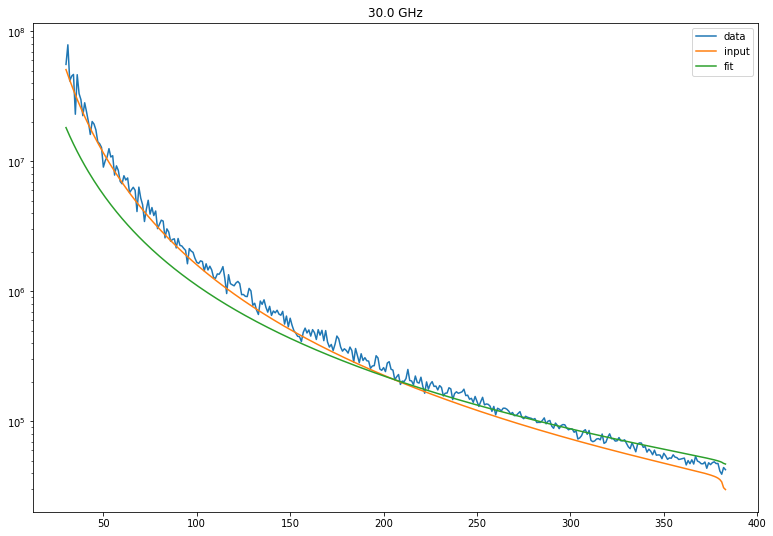

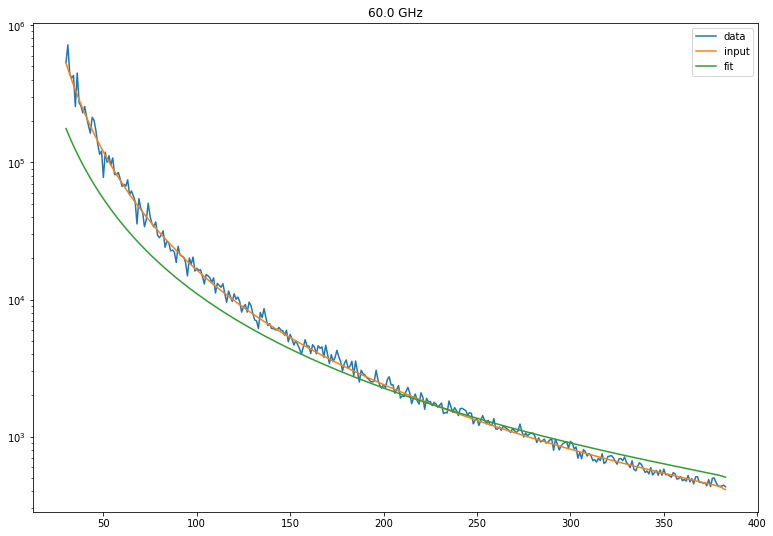

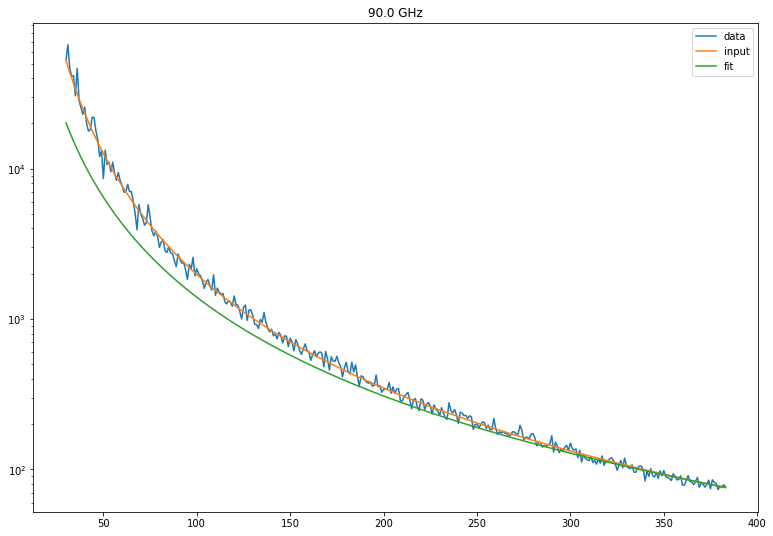

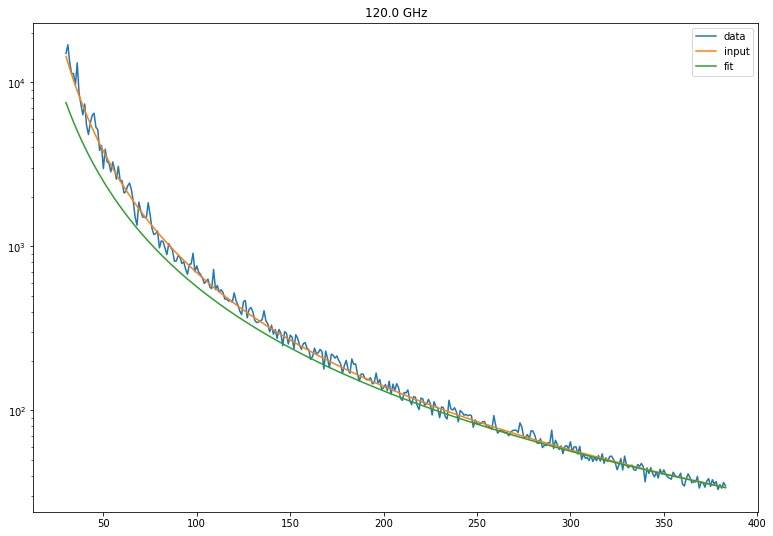

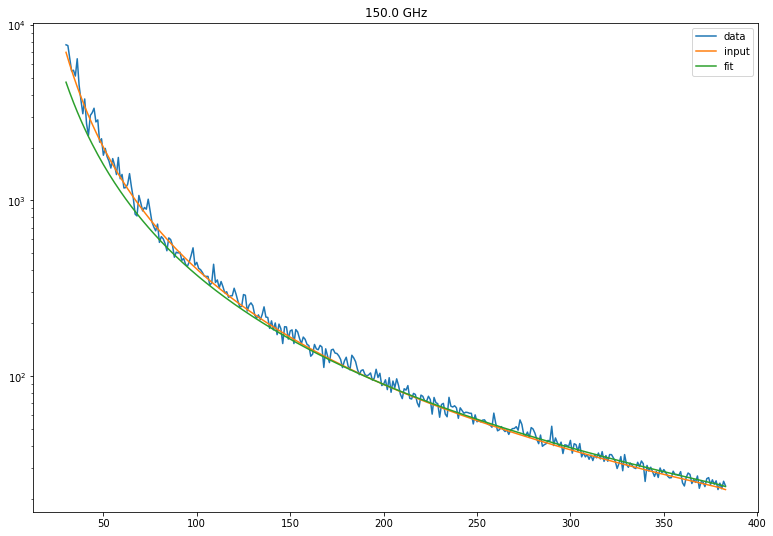

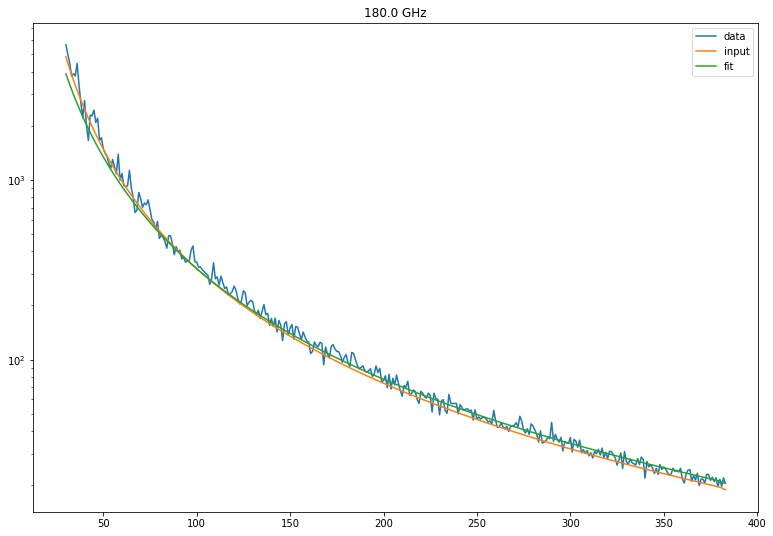

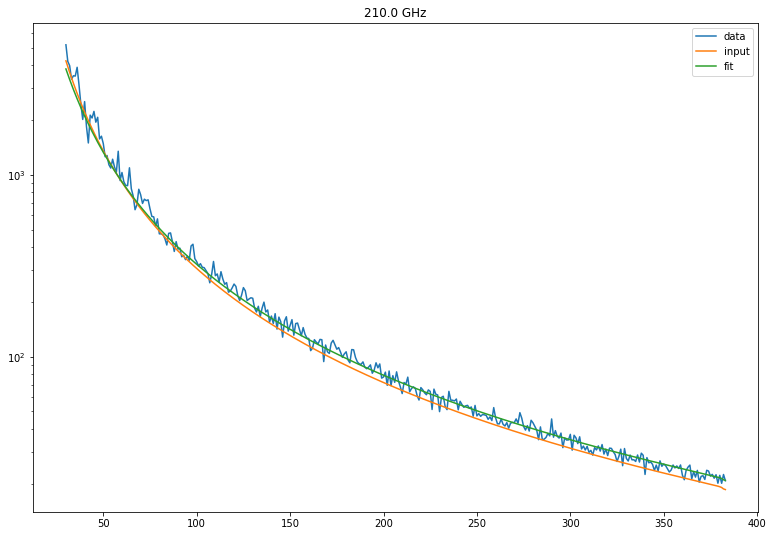

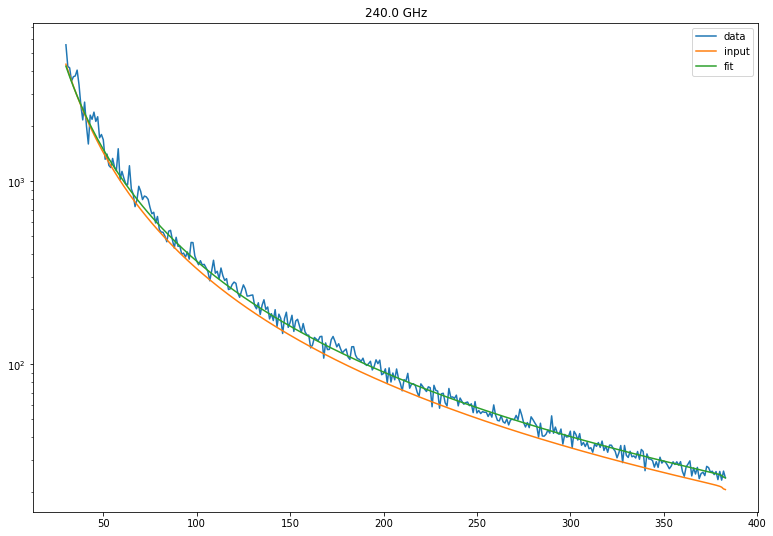

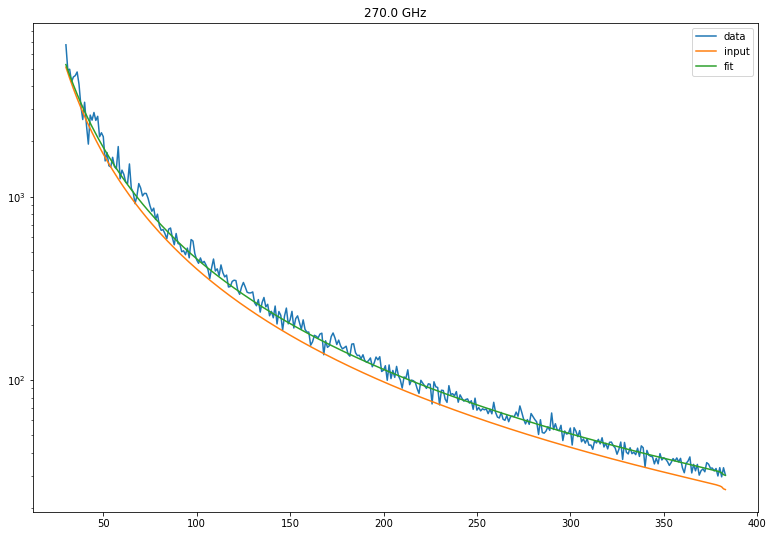

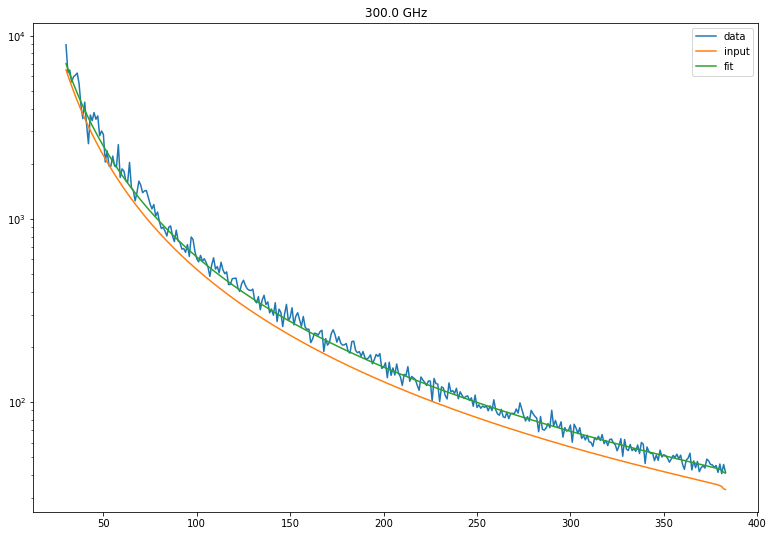

In [183]:
for i in range(len(freqs)):
    figure(figsize=(13,9))
    semilogy(ells[30:], data[i][30:], label='data')
    semilogy(ells[30:], model_fg[i][30:], label='input')
    semilogy(ells[30:], fit1[i][30:], label='fit')
    title(str(np.round(1e-9*freqs[i])) + ' GHz')
    legend()

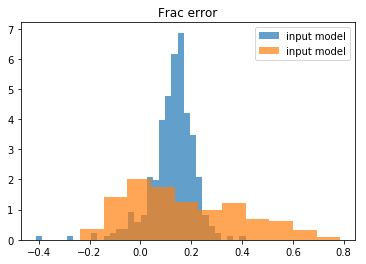

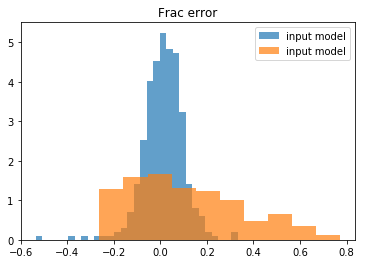

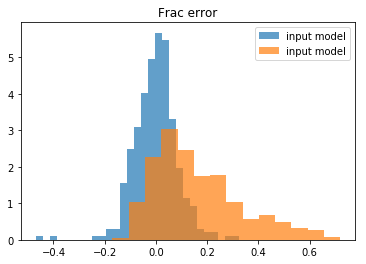

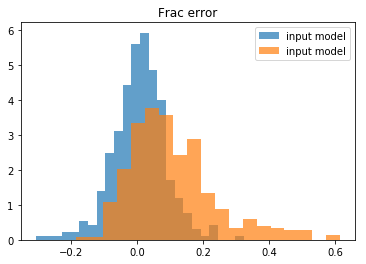

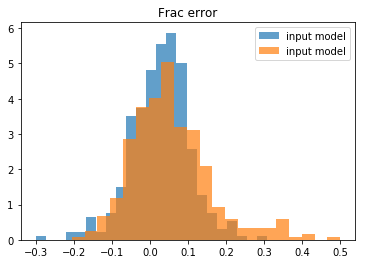

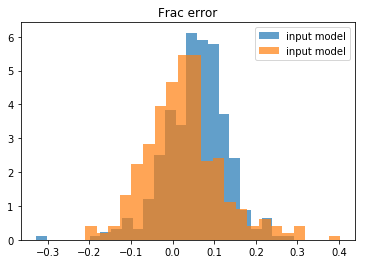

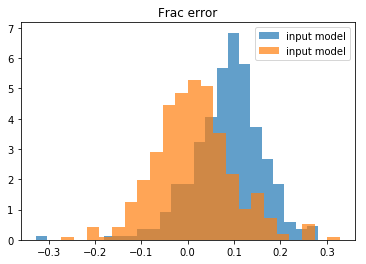

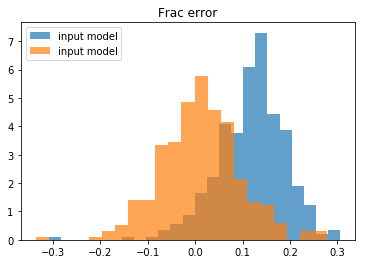

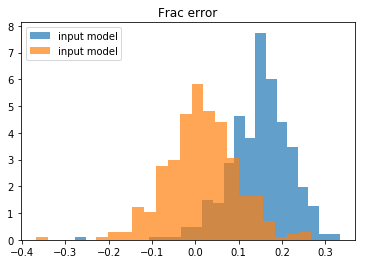

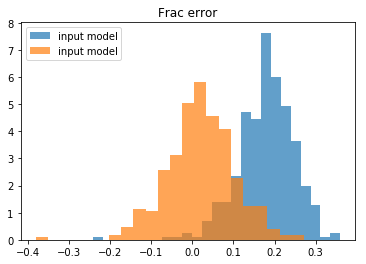

In [186]:
for i in range(len(freqs)):
    figure()
    hist((data[i][30:]-model_fg[i][30:])/data[i][30:], bins='auto', density=True, alpha=0.7, label='input model')
    hist((data[i][30:]-fit1[i][30:])/data[i][30:], bins='auto', density=True, alpha=0.7, label='input model')
    title('Frac error')
    legend()